In [127]:
#asas

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltii
%matplotlib inline
import seaborn as sns

In [118]:
df = pd.read_json('reddit_combined.json')

In [119]:
df.head()

,age,num_comments,score,text,timestamp
0,5 hours ago,1588,21720,China Killing Prisoners To Harvest Organs For ...,2019-06-19 11:49:08
1,4 hours ago,402,2661,Muslim family dragged out of Belgian embassy i...,2019-06-19 12:05:31
10,16 hours ago,228,1453,Heat to smash records every year across vast s...,2019-06-19 00:08:13
1000,5 hours ago,709,12055,Trump Organization ‘Sold Property to Shell Com...,2019-05-07 13:38:39
1001,6 hours ago,920,5497,"A ""caravan"" of Americans is crossing the Canad...",2019-05-07 12:54:55


In [120]:
def clean_age(text):
    """Compute age in minutes"""
    if 'day' in text:
        return 1440
    if 'hour' in text:
        return int(text[:2]) * 60
    else:
        return int(text[:2])

In [121]:
df.loc[:,'weekday_posted'] = df['timestamp'].map(lambda x: x.weekday())
df.loc[:,'hour_posted'] = df['timestamp'].map(lambda x: x.hour)
df['age'] = df['age'].map(clean_age)

In [122]:
df.head()

,age,num_comments,score,text,timestamp,weekday_posted,hour_posted
0,300,1588,21720,China Killing Prisoners To Harvest Organs For ...,2019-06-19 11:49:08,2,11
1,240,402,2661,Muslim family dragged out of Belgian embassy i...,2019-06-19 12:05:31,2,12
10,960,228,1453,Heat to smash records every year across vast s...,2019-06-19 00:08:13,2,0
1000,300,709,12055,Trump Organization ‘Sold Property to Shell Com...,2019-05-07 13:38:39,1,13
1001,360,920,5497,"A ""caravan"" of Americans is crossing the Canad...",2019-05-07 12:54:55,1,12


## First, lets check out correlations, and distributions of some of the numerical categories

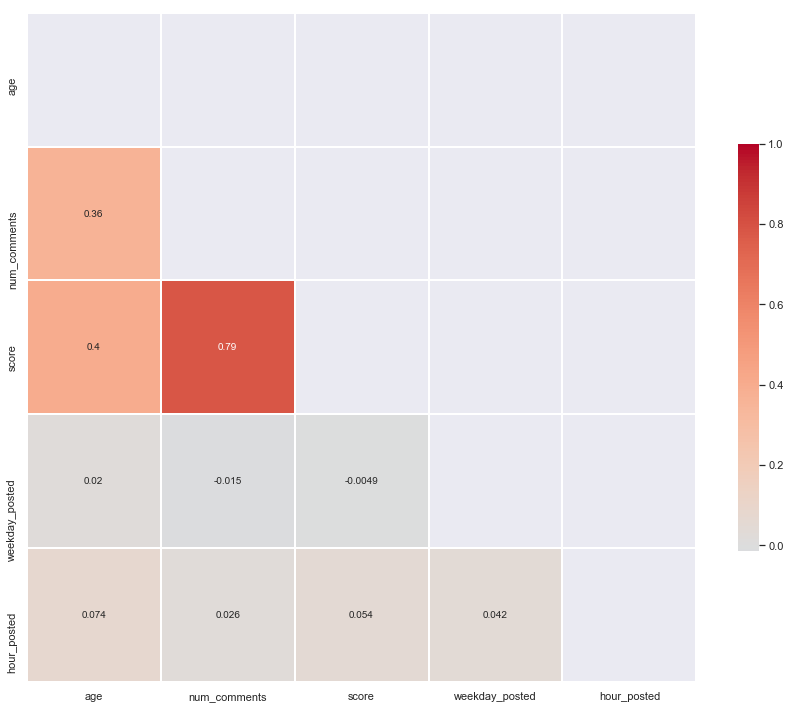

In [123]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=1,annot=True, cbar_kws={"shrink": .5});

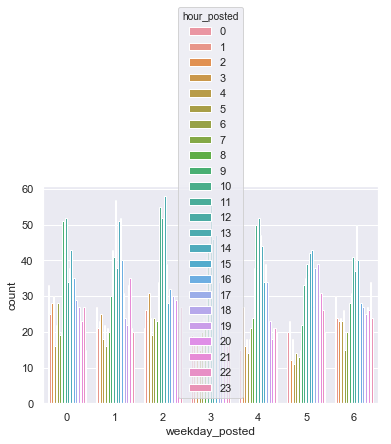

In [126]:
sns.countplot(x='weekday_posted', hue='hour_posted', data=df);

In [ ]:
df.hist(figsize=[15,15]);

### Number of comments and score are skewed right, let's take the log of each 

In [50]:
df.loc[:,'log_score'] = np.log(df['score'])
df.loc[:,'log_comments'] = np.log(df['num_comments'] + 0.01)

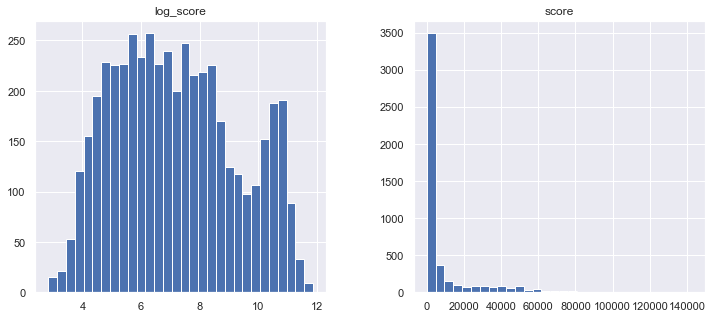

In [51]:
df[['log_score', 'score']].hist(figsize=(12,5),bins=30);

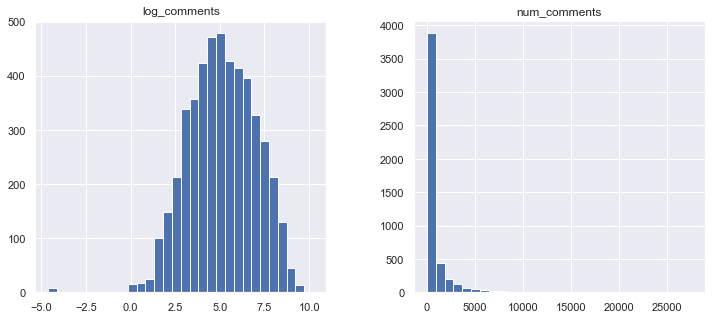

In [53]:
df[['log_comments', 'num_comments']].hist(figsize=(12,5),bins=30);

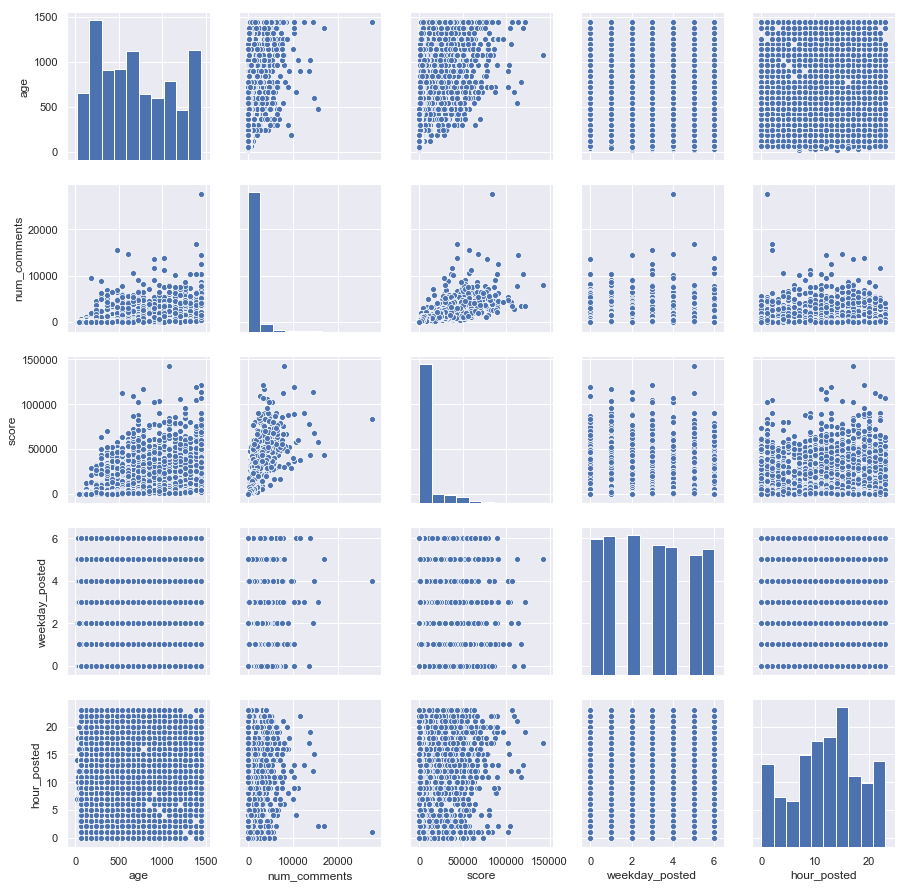

In [61]:
num_df = df[['age','num_comments','score','weekday_posted','hour_posted']]
sns.pairplot(num_df)


In [111]:
# df.loc[:,'score_per_min'] = df['score'] / df['age']
# necessary, the models will do the math for us

In [86]:
df.loc[df['score_per_min'] == 0]

,age,num_comments,score,text,timestamp,weekday_posted,hour_posted,log_score,log_comments,score_per_min


Text(0, 0.5, 'total count')

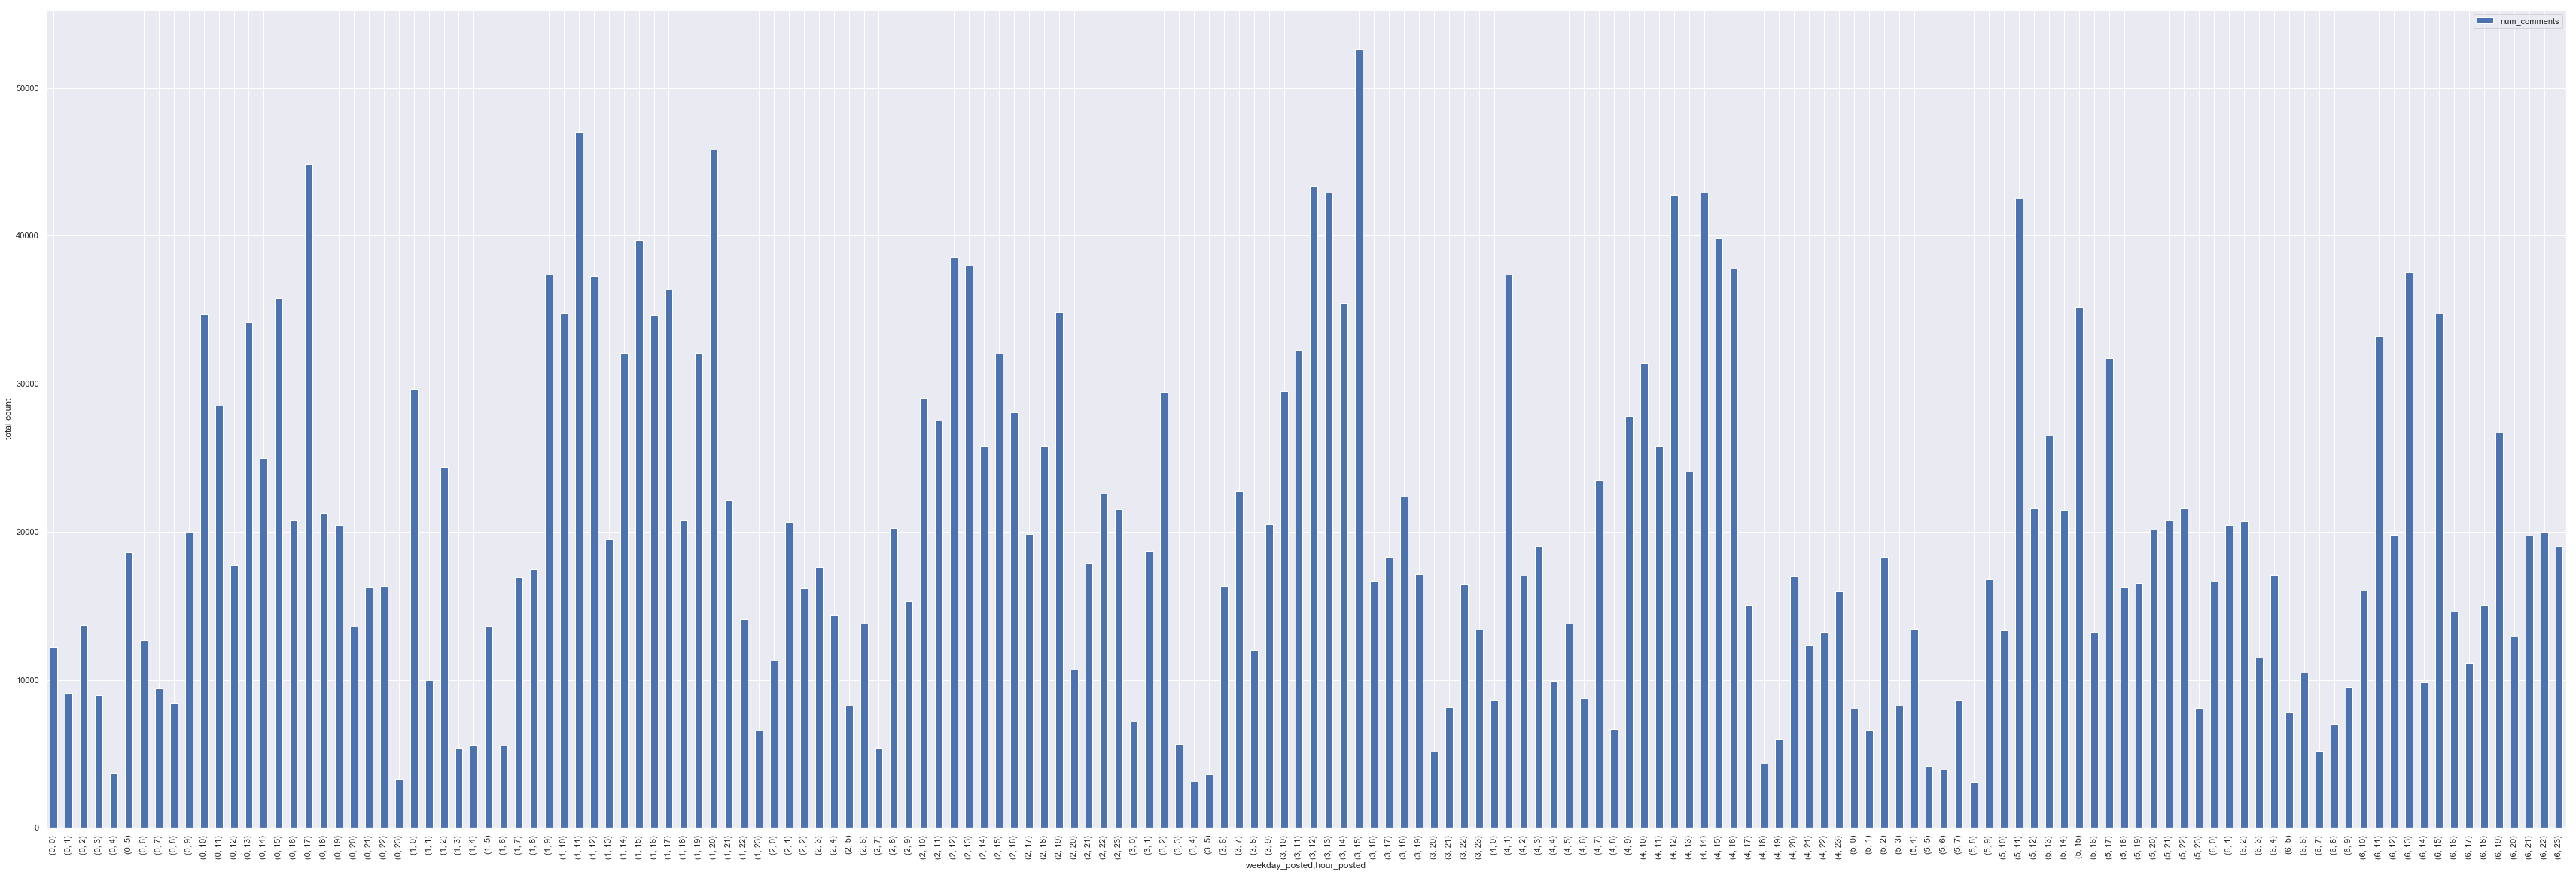

In [108]:
df[['weekday_posted','num_comments','hour_posted']].groupby(
    ['weekday_posted','hour_posted']).sum().plot.bar(figsize=(60,20))
plt.ylabel('total count')
plt.xtick

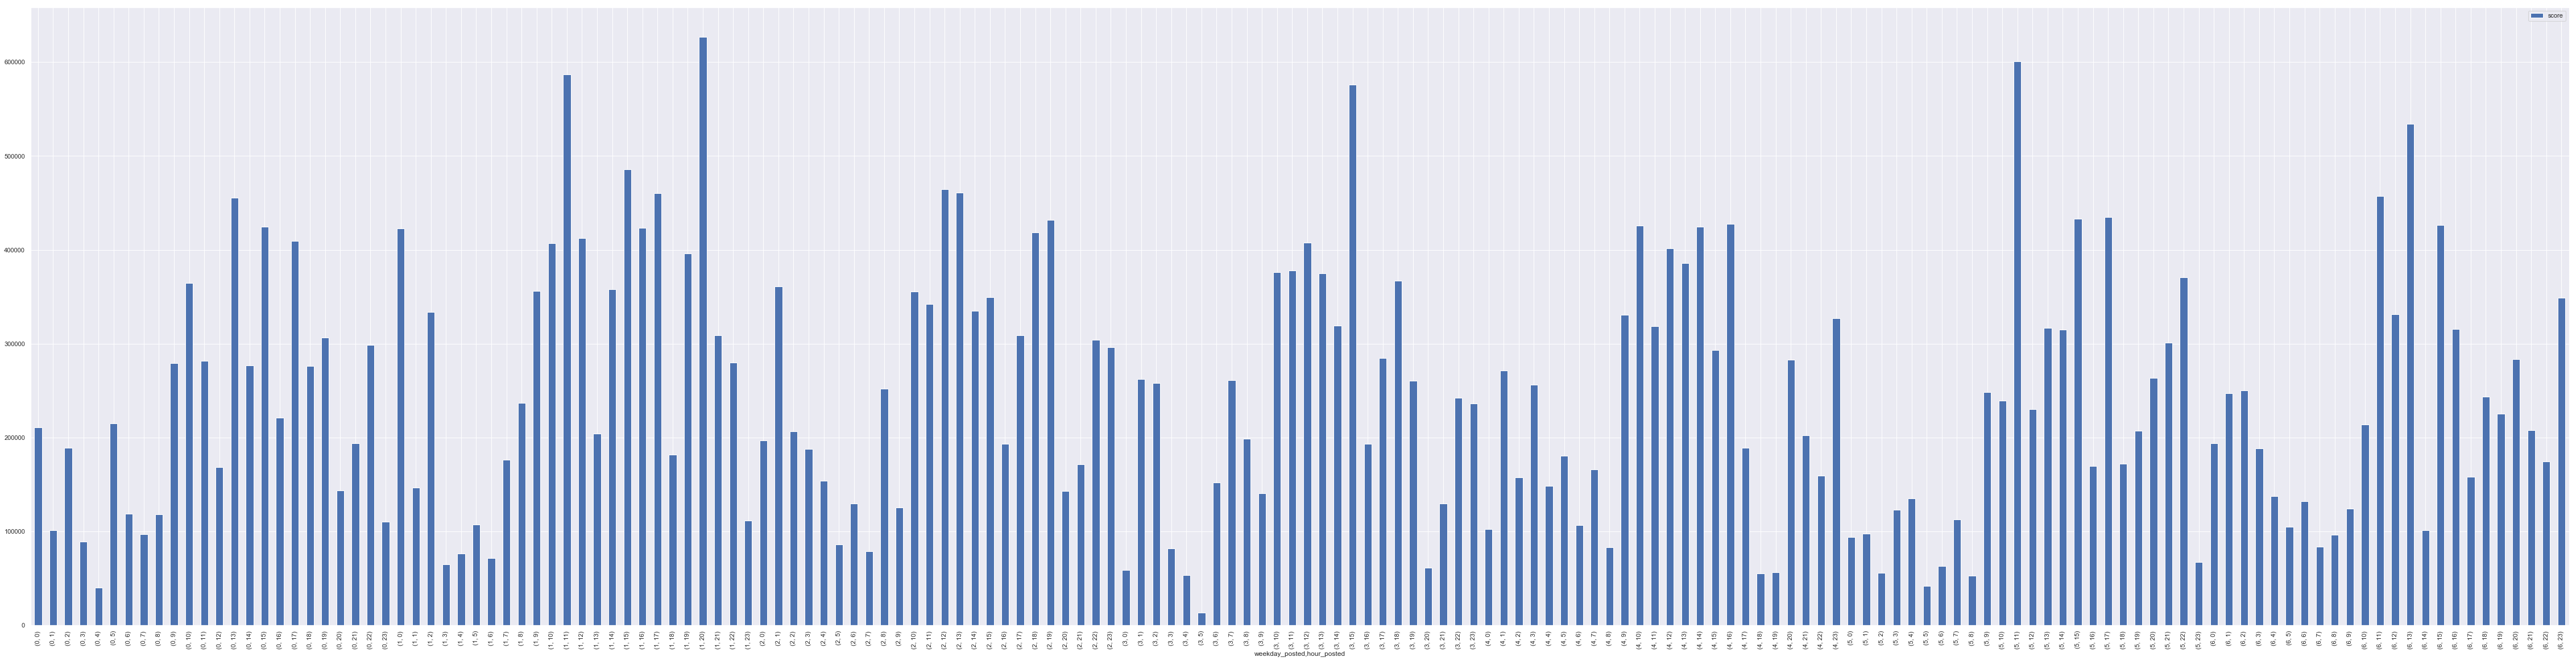

In [109]:
df[['score','weekday_posted','hour_posted']].groupby(['weekday_posted','hour_posted']).sum().plot.bar(figsize=(80,20))

### This is cool, and shows that there is a differerence in engagement in posts posted around 

In [114]:
df = df.drop('score_per_min',axis=1)

In [110]:
df.head()

,age,num_comments,score,text,timestamp,weekday_posted,hour_posted,log_score,log_comments,score_per_min
0,300,1588,21720,China Killing Prisoners To Harvest Organs For ...,2019-06-19 11:49:08,2,11,9.985989,7.370237,72.400000
1,240,402,2661,Muslim family dragged out of Belgian embassy i...,2019-06-19 12:05:31,2,12,7.886457,5.996477,11.087500
10,960,228,1453,Heat to smash records every year across vast s...,2019-06-19 00:08:13,2,0,7.281386,5.429389,1.513542
1000,300,709,12055,Trump Organization ‘Sold Property to Shell Com...,2019-05-07 13:38:39,1,13,9.397235,6.563870,40.183333
1001,360,920,5497,"A ""caravan"" of Americans is crossing the Canad...",2019-05-07 12:54:55,1,12,8.611958,6.824385,15.269444
